In [3]:
#----------IMPORTS------------
import json, re
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pattern.nl import sentiment
from collections import defaultdict
from matplotlib.backends.backend_pdf import PdfPages

#-----UNBOUND VARIABLES-------

#----------CODE---------------

plt.close()
print('plots closed')

file = json.load(open('C:\\Users\\sternheimam\\Dropbox\\TNO\\Scriptie\\4. Data\\viva_forum_latest_summarized.json'))
testsent=(file[0:1000])
print('file loaded')

plots closed
file loaded


In [4]:
#make list of triples (author, sentiment, questionmarks) for each line of text
def annotated_data(data):
    # bound variables
    name = ''
    sentim = 0
    polarity = 0
    polcount = 0
    questionmark = 0
    authorlist = []

    for line in data:
        name=line['author']
        if isinstance(line['text'],unicode):
            polarity += sentiment(line['text'])[0]
            polcount+=1
            if re.search('\?',line['text']): 
                    questionmark+=1
        elif isinstance(line['text'],list):
            for textfeatures in line['text']:
                polarity += sentiment(textfeatures['sentence'])[0]
                polcount+=1
                if re.search('\?',textfeatures['sentence']): 
                    questionmark+=1
        sentim = polarity/polcount
        authorlist.append((name,sentim,questionmark))
        questionmark=0
        polarity=0
        polcount=0
    print('authorlist generated')
    return(authorlist)

In [5]:
# I do not know how to make the list of triples into a dictionary containing two lists as value in ONE step,
# so I make two dictionaries and combine those into one..

def make_dictionary(authorlist):
    author_sent = defaultdict(list)
    author_ques = defaultdict(list)
    for name, s_val, q_val in authorlist:
        author_sent[name].append(s_val) 
        author_ques[name].append(q_val)
    print('dictionaries generated')

    all_dict = defaultdict(list)
    for key in author_sent.keys():
        all_dict[key].append((author_sent[key]))
    for key in author_ques.keys():
        all_dict[key].append(author_ques[key])
    print('dictionaries combined')
    return(all_dict)

In [6]:
# Present the data. Here, I make a plot for every user, over time.
# also save to pdf
def plots_by_author(all_dict):
    pp = PdfPages("plots-author.pdf")
    for name in all_dict.keys():
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        ax1.plot(all_dict[name][0], 'g-', alpha=0.5) # green = sentiment
        ax2.plot(all_dict[name][1], 'r-', alpha=0.5) # red = question marks
        ax1.set_ylabel('Sentiment', color='g')
        ax2.set_ylabel('Question Marks', color='r')

        ax1.set_ylim(-1,1)
        ax2.set_ylim(-5,5)
        plt.title(name)
        
        figur=plt.figure(1)
        plt.show()
        pp.savefig(figur, dpi = 300, transparent = True)
    pp.close()

In [7]:
# Present the data differently: Here I make a plot for every variable.
# I doubt whether it provides a lot of insight, as I expect that every patient needs different amounts of time to get empowered by the forum
# therefore, empowered and disempowered patients probably level each other out.
# In any case I got to experiment with line plots and scatter plots and trend lines.

def scatter_plots_by_variable(all_dict):
    pp = PdfPages("plots-variable.pdf")
    j=0
    for j in range(len(all_dict.values()[0])):

        plotlist=[]
        lenlist=[]
        listlist=[]
        
        i=0
        while i>=0:
            somelist=[]

            for name in all_dict:
                if len(all_dict[name][j])>i:
                    somelist.append(all_dict[name][j][i])
                    #print(somelist)
                else:
                    #print(len(all_dict[name][j]),'<',i)
                    pass
            if len(somelist) == 0:
                break
            else:
                listlist.append(somelist)
                plotlist.append(np.mean(somelist))
                lenlist.append(len(somelist))
                i+=1

    # plots showing means per post and trend lines  
        plt.close()        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        x = np.array([i for i in range(len(plotlist))])
        y = plotlist

        ax1.scatter(x,y,s=5, color='green',alpha=0.6) # green = sentiment
        ax2.plot(lenlist, 'r-', alpha=0.2) # red = question marks

        #fit = np.polyfit(x, y, deg=1)
        #ax1.plot(x, fit[0] * x + fit[1], 'b-', alpha=0.8)

        ax1.set_ylabel('Mean', color='g')
        ax2.set_ylabel('Frequency', color='r')
        ax1.set_xlim(0,)

        if j==0:
            ax1.set_ylim(0,1)
            ax2.set_ylim(0,15)
            plt.title('Mean sentiment per post')
        else:
            ax1.set_ylim(0,6)
            ax2.set_ylim(0,15)
            plt.title('Mean nr of question marks per post')
        j+=1
        
    # scatter plot of all measured values
        #n=0
        #for lists in listlist:
        #    for elements in lists:
        #        ax1.scatter(n,elements, color='blue', s=3, alpha=0.4) # adjusting s to s=len(lists) changes the size of the dots respective to the nr of measurements. would be cool to do with means
        #    n+=1
        figur=plt.figure(1)
        plt.show()
        pp.savefig(figur, dpi = 300, transparent = True)
    pp.close()

authorlist generated
dictionaries generated
dictionaries combined


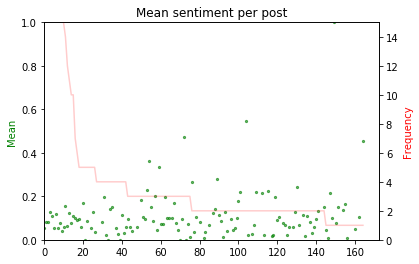

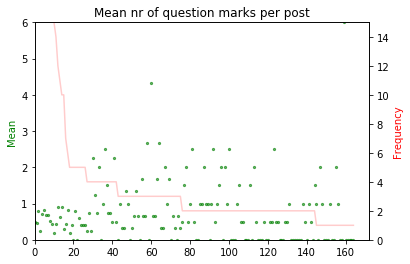

In [8]:
authorlist=annotated_data(testsent)
all_dict=make_dictionary(authorlist)
#plots_by_author(all_dict)
scatter_plots_by_variable(all_dict)